In [4]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('smsspamcollection.csv')
#df = pd.read_csv('spam.csv')

In [7]:
df.sample(5)

,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
766,ham,"I'm nt goin, got somethin on, unless they meet..."
2254,ham,Ok. Me watching tv too.
1764,spam,Hi 07734396839 IBH Customer Loyalty Offer: The...
4976,ham,You are gorgeous! keep those pix cumming :) th...
224,spam,"500 New Mobiles from 2004, MUST GO! Txt: NOKIA..."


In [8]:
df.shape

(5571, 2)

In [ ]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5571 entries, 0 to 5570
Data columns (total 2 columns):
 #   Column                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                           --------------  ----- 
 0   ham                                                                                                              5571 non-null   object
 1   Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...  5571 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

KeyError: "['Unnamed: 2' 'Unnamed: 3' 'Unnamed: 4'] not found in axis"

In [11]:
df.sample(5)

,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1830,ham,That's the way you should stay oh.
1824,ham,Sent me ur email id soon
1919,ham,Yar i wanted 2 scold u yest but late already.....
3823,ham,Please protect yourself from e-threats. SIB ne...
5502,ham,Perhaps * is much easy give your account ident...


In [15]:
# renaming the cols
#df.rename(columns={'v1':'target','v2':'text'},inplace=True)
#df.sample(5)

df.rename(columns={'ham':'target','Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...':'text'},inplace=True)
df.sample(5)

,target,text
407,ham,Hello! Good week? Fancy a drink or something l...
1357,ham,Good afternoon loverboy ! How goes you day ? A...
3532,ham,"Actually, my mobile is full of msg. And i m do..."
1455,spam,Summers finally here! Fancy a chat or flirt wi...
4383,ham,No need lar i go engin? Cos my sis at arts tod...


In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [17]:
df['target'] = encoder.fit_transform(df['target'])

In [18]:
df.head()

,target,text
0,0,Ok lar... Joking wif u oni...
1,1,Free entry in 2 a wkly comp to win FA Cup fina...
2,0,U dun say so early hor... U c already then say...
3,0,"Nah I don't think he goes to usf, he lives aro..."
4,1,FreeMsg Hey there darling it's been 3 week's n...


In [19]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [20]:
# check for duplicate values
df.duplicated().sum()

403

In [21]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [22]:
df.duplicated().sum()

0

In [23]:
df.shape

(5168, 2)

## 2.EDA

In [24]:
df.head()

,target,text
0,0,Ok lar... Joking wif u oni...
1,1,Free entry in 2 a wkly comp to win FA Cup fina...
2,0,U dun say so early hor... U c already then say...
3,0,"Nah I don't think he goes to usf, he lives aro..."
4,1,FreeMsg Hey there darling it's been 3 week's n...


In [25]:
df['target'].value_counts()

0    4515
1     653
Name: target, dtype: int64

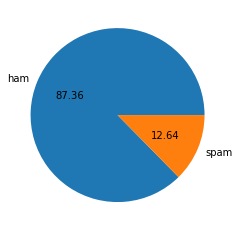

In [26]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [34]:
# Data is imbalanced

In [73]:
import nltk

In [74]:
!pip install nltk

In [87]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('PorterStemmer')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hmlms\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hmlms\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading PorterStemmer: Package 'PorterStemmer' not
[nltk_data]     found in index


False

In [51]:
 df['num_characters'] = df['text'].apply(len)

C:\Users\hmlms\AppData\Local\Temp/ipykernel_15796/1264273799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [54]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,Ok lar... Joking wif u oni...,29,8,2
1,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
2,0,U dun say so early hor... U c already then say...,49,13,1
3,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
4,1,FreeMsg Hey there darling it's been 3 week's n...,147,39,4


In [55]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\hmlms\AppData\Local\Temp/ipykernel_15796/192676766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [56]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,Ok lar... Joking wif u oni...,29,8,2
1,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
2,0,U dun say so early hor... U c already then say...,49,13,1
3,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
4,1,FreeMsg Hey there darling it's been 3 week's n...,147,39,4


In [57]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\hmlms\AppData\Local\Temp/ipykernel_15796/4112269855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [58]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,Ok lar... Joking wif u oni...,29,8,2
1,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
2,0,U dun say so early hor... U c already then say...,49,13,1
3,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
4,1,FreeMsg Hey there darling it's been 3 week's n...,147,39,4


In [59]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5168.000000,5168.000000,5168.000000
mean,79.338429,18.609907,1.970201
std,58.441452,13.418323,1.444369
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.250000,2.000000
max,910.000000,220.000000,38.000000


In [60]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4515.000000,4515.000000,4515.000000
mean,70.897010,17.285714,1.823477
std,56.718188,13.607133,1.376452
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [61]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.704441,27.765697,2.984686
std,29.821348,6.992892,1.495313
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [62]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

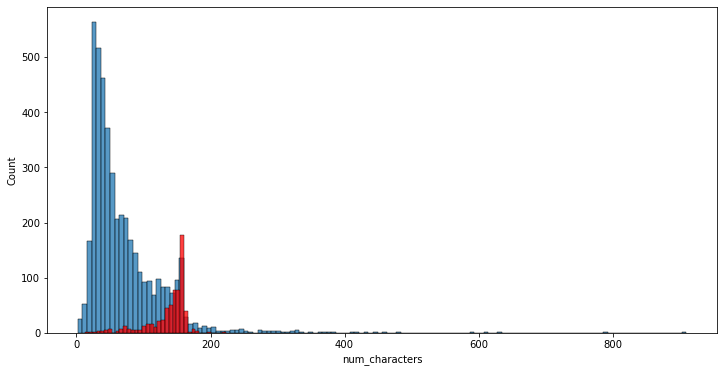

In [63]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

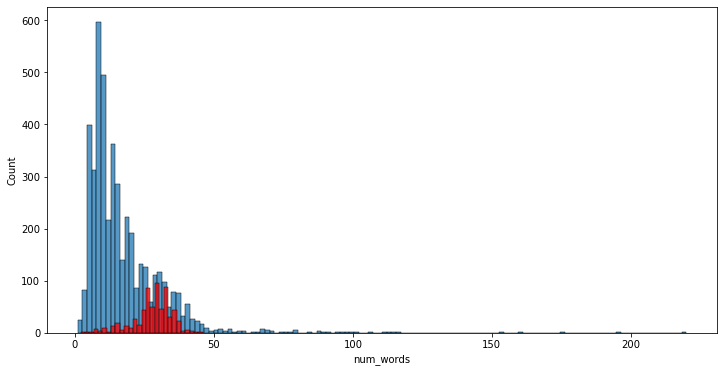

In [42]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

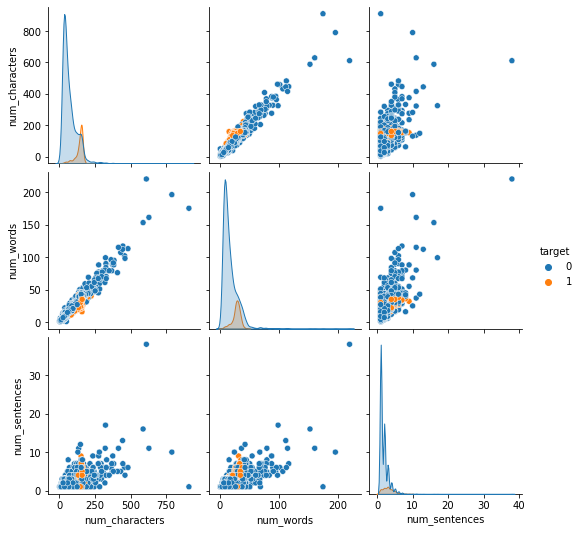

In [64]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

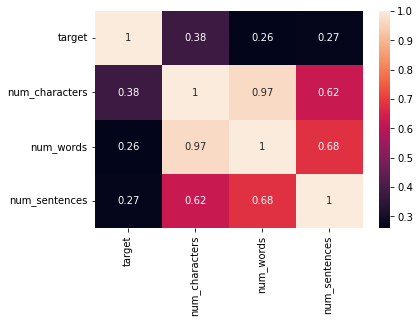

In [65]:
sns.heatmap(df.corr(),annot=True)

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [78]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [79]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [89]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [90]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [91]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [93]:
df['text'][0]

'Ok lar... Joking wif u oni...'

In [186]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [96]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\hmlms\AppData\Local\Temp/ipykernel_15796/283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [97]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
1,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
2,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
3,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
4,1,FreeMsg Hey there darling it's been 3 week's n...,147,39,4,freemsg hey darl 3 week word back like fun sti...


In [101]:
!pip install wordcloud

In [102]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [103]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

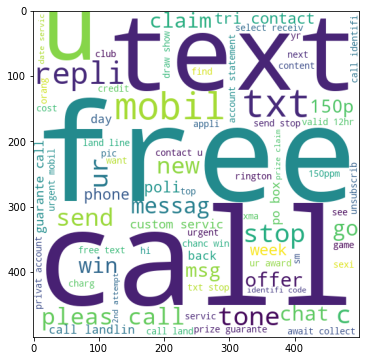

In [104]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [105]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

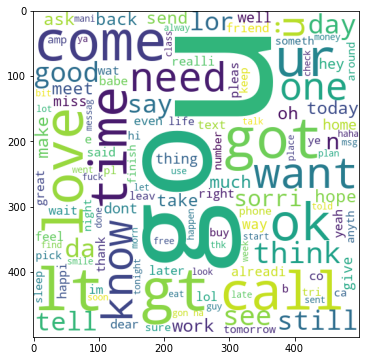

In [106]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [107]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
1,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
2,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
3,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
4,1,FreeMsg Hey there darling it's been 3 week's n...,147,39,4,freemsg hey darl 3 week word back like fun sti...


In [111]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [112]:
len(spam_corpus)

9983

C:\Users\hmlms\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


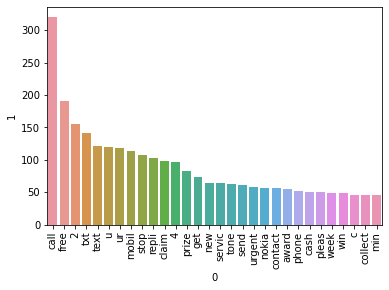

In [113]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [114]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [282]:
len(ham_corpus)

35303

C:\Users\91842\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


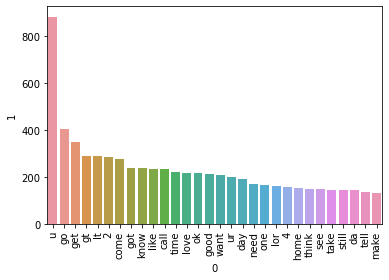

In [284]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [115]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
1,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
2,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
3,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
4,1,FreeMsg Hey there darling it's been 3 week's n...,147,39,4,freemsg hey darl 3 week word back like fun sti...


## 4. Model Building

In [117]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [118]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [470]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [483]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [119]:
X.shape

(5168, 3000)

In [120]:
y = df['target'].values

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [123]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [124]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [125]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8713733075435203
[[787 112]
 [ 21 114]]
0.504424778761062


In [126]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.971953578336557
[[898   1]
 [ 28 107]]
0.9907407407407407


In [127]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9854932301740812
[[898   1]
 [ 14 121]]
0.9918032786885246


In [128]:
# tfidf --> MNB

In [132]:
!pip install xgboost

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
#import XGBClassifier

In [135]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [140]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [141]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [142]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9806576402321083, 0.9914529914529915)

In [143]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9806576402321083
Precision -  0.9914529914529915
For  KN
Accuracy -  0.9158607350096711
Precision -  1.0
For  NB
Accuracy -  0.971953578336557
Precision -  0.9907407407407407
For  DT
Accuracy -  0.9361702127659575
Precision -  0.8349514563106796
For  LR
Accuracy -  0.9526112185686654
Precision -  0.9574468085106383
For  RF
Accuracy -  0.9748549323017408
Precision -  0.990990990990991
For  AdaBoost
Accuracy -  0.9622823984526112
Precision -  0.9363636363636364
For  BgC
Accuracy -  0.9642166344294004
Precision -  0.8769230769230769
For  ETC
Accuracy -  0.9787234042553191
Precision -  0.9829059829059829
For  GBDT
Accuracy -  0.9458413926499033
Precision -  0.9647058823529412
For  xgb
Accuracy -  0.9700193423597679
Precision -  0.9482758620689655


In [144]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [145]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.915861,1.000000
0,SVC,0.980658,0.991453
5,RF,0.974855,0.990991
2,NB,0.971954,0.990741
8,ETC,0.978723,0.982906
9,GBDT,0.945841,0.964706
4,LR,0.952611,0.957447
10,xgb,0.970019,0.948276
6,AdaBoost,0.962282,0.936364
7,BgC,0.964217,0.876923


In [146]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [147]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.915861
1,SVC,Accuracy,0.980658
2,RF,Accuracy,0.974855
3,NB,Accuracy,0.971954
4,ETC,Accuracy,0.978723
5,GBDT,Accuracy,0.945841
6,LR,Accuracy,0.952611
7,xgb,Accuracy,0.970019
8,AdaBoost,Accuracy,0.962282
9,BgC,Accuracy,0.964217


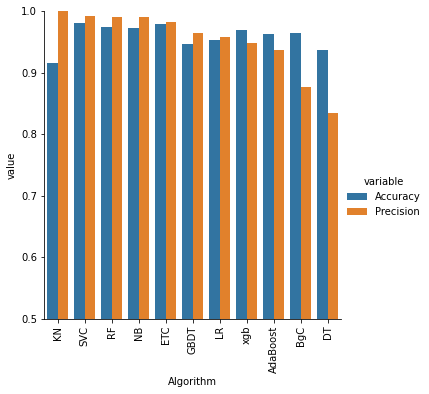

In [148]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [149]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [150]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [151]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [152]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [153]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [501]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,KN,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190,0.928433,0.771186
1,NB,0.959381,1.000000,0.971954,1.000000,0.978723,0.946154,0.940039,1.000000
2,ETC,0.977756,0.991453,0.979691,0.975610,0.979691,0.975610,0.976789,0.975000
3,RF,0.970019,0.990826,0.975822,0.982906,0.975822,0.982906,0.974855,0.982759
4,SVC,0.972921,0.974138,0.974855,0.974576,0.971954,0.943089,0.866538,0.000000
5,AdaBoost,0.962282,0.954128,0.961315,0.945455,0.961315,0.945455,0.971954,0.950413
6,xgb,0.971954,0.950413,0.968085,0.933884,0.968085,0.933884,0.970019,0.942149
7,LR,0.951644,0.940000,0.956480,0.969697,0.967118,0.964286,0.961315,0.971154
8,GBDT,0.951644,0.931373,0.946809,0.927835,0.946809,0.927835,0.948743,0.929293
9,BgC,0.957447,0.861538,0.959381,0.869231,0.959381,0.869231,0.968085,0.913386


In [154]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [155]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [156]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [157]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9854932301740812
Precision 0.9918032786885246


In [158]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [159]:
from sklearn.ensemble import StackingClassifier

In [160]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [161]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9845261121856866
Precision 0.9612403100775194


In [162]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))